In [59]:
from snakemake.iao import expand
import pandas as pd
import yaml
import pdb
import re
import numpy as np
import pyranges as pr
import cerberus
import seaborn as sns
from utils import *

In [60]:
config_file = 'config.yml'
with open(config_file) as f:
    config = yaml.safe_load(f)

In [61]:
h5 = expand(config['data']['cerb']['ca_trip'], zip, species='human')[0]
ab = expand(config['data']['cerb']['agg_ab'], zip, species='human')[0]
meta = expand(config['data']['meta'], zip, species='human')[0]

In [64]:
ca = cerberus.read(h5)

In [66]:
temp = ca.triplets.loc[ca.triplets.source=='iPSC_Embryo_pacBioSII_post-capture_human_all']
len(temp.index)

106

In [74]:
df = pd.read_csv(ab, sep='\t')
df.fillna(0, inplace=True)
df['gene_id'] = df.annot_transcript_id.str.split('[', expand=True)[0]
df.drop(['annot_transcript_id', 'annot_transcript_name'], axis=1, inplace=True)
print(len(df.index))

125223


559

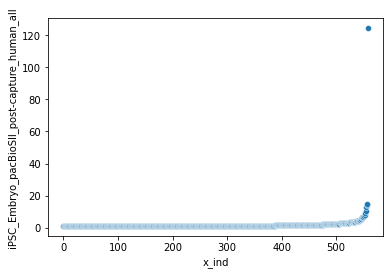

In [79]:
source = 'iPSC_Embryo_pacBioSII_post-capture_human_all'
temp = df[[source]]
df = df.sort_values(by=source,ascending=True)
df = df.loc[df[source]>0]
df['x_ind'] = [i for i in range(len(df.index))]
sns.scatterplot(data=df, x='x_ind', y=source)
len(temp.loc[temp[source]>=1])
# temp

125223
19003
0


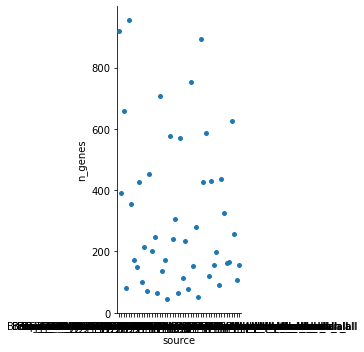

In [63]:
# add gene TPMs
df = pd.read_csv(ab, sep='\t')
df.fillna(0, inplace=True)
df['gene_id'] = df.annot_transcript_id.str.split('[', expand=True)[0]
df.drop(['annot_transcript_id', 'annot_transcript_name'], axis=1, inplace=True)
print(len(df.index))

# sum up 
df = df.groupby('gene_id').sum()
print(len(df.index))
df = df.melt(ignore_index=False, var_name='source', value_name='gene_tpm').reset_index()

temp = ca.triplets[['source', 'gene_id']]
temp = temp.groupby('source').count().reset_index().rename({'gene_id':'n_genes'}, axis=1)
sns.catplot(temp, x='source', y='n_genes')

ca.triplets = ca.triplets.merge(df, how='left', on=['gene_id', 'source'])
print(len(ca.triplets.loc[ca.triplets.gene_tpm.isnull()]))

ca.write('ca_trip_tpm.h5')

In [43]:
len(ca.triplets.source.unique())

48

In [48]:
# add in the metadata
config_fname = '230614_config.tsv'
df = parse_input_config(config, config_fname, 'all')
df = df.loc[df.species == 'human']
df.rename({'dataset':'source'}, axis=1, inplace=True)

In [49]:
len(df.index)

48

In [50]:
ca.triplets.head()

,source,gene_id,n_iso,n_tss,n_ic,n_tes,splicing_ratio,tss_ratio,tes_ratio,spl_ratio,sector,gene_tpm
0,Brain_Adult_ont_post-capture_human_all,ENSG00000002822,1.0,1.0,1.0,1.0,1.000000,0.333333,0.333333,0.333333,simple,9.92513
1,Brain_Adult_ont_post-capture_human_all,ENSG00000005022,1.0,1.0,1.0,1.0,1.000000,0.333333,0.333333,0.333333,simple,9.92513
2,Brain_Adult_ont_post-capture_human_all,ENSG00000005075,5.0,4.0,5.0,2.0,1.666667,0.521739,0.260870,0.217391,tss,69.47591
3,Brain_Adult_ont_post-capture_human_all,ENSG00000008324,1.0,1.0,1.0,1.0,1.000000,0.333333,0.333333,0.333333,simple,9.92513
4,Brain_Adult_ont_post-capture_human_all,ENSG00000035141,1.0,1.0,1.0,1.0,1.000000,0.333333,0.333333,0.333333,simple,29.77539


In [52]:
print(len(ca.triplets.index))
ca.triplets = ca.triplets.merge(df, how='left', on='source')
print(len(ca.triplets.index))


15075
15075


In [54]:
ca.triplets.source.unique()

array(['Brain_Adult_ont_post-capture_human_all',
       'Brain_Adult_ont_pre-capture_human_all',
       'Brain_Adult_pacBioSII_post-capture_human_all',
       'Brain_Adult_pacBioSII_pre-capture_human_all',
       'Brain_Embryo_ont_post-capture_human_all',
       'Brain_Embryo_ont_pre-capture_human_all',
       'Brain_Embryo_pacBioSII_post-capture_human_all',
       'Brain_Embryo_pacBioSII_pre-capture_human_all',
       'CpoolA_Adult_ont_post-capture_human_all',
       'CpoolA_Adult_ont_pre-capture_human_all',
       'CpoolA_Adult_pacBioSII_post-capture_human_all',
       'CpoolA_Adult_pacBioSII_pre-capture_human_all',
       'Heart_Adult_ont_post-capture_human_all',
       'Heart_Adult_ont_pre-capture_human_all',
       'Heart_Adult_pacBioSII_post-capture_human_all',
       'Heart_Adult_pacBioSII_pre-capture_human_all',
       'Heart_Embryo_ont_post-capture_human_all',
       'Heart_Embryo_ont_pre-capture_human_all',
       'Heart_Embryo_pacBioSII_post-capture_human_all',
       'Heart

In [56]:
temp = ca.triplets[['source', 'gene_id']]
temp = temp.groupby('source').count().reset_index().rename({'gene_id':'n_genes'}, axis=1)

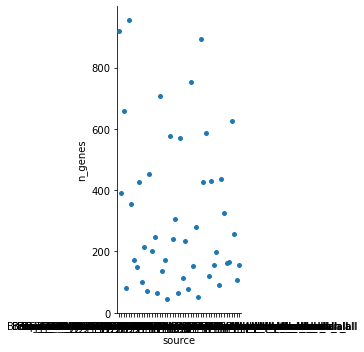

In [58]:
import seaborn as sns
sns.catplot(temp, x='source', y='n_genes')